In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
census = pd.read_csv('census.csv')
census['education'] = pd.Categorical(census["education"])
census['education']=census['education'].cat.codes
census['marital.status'] = pd.Categorical(census["marital.status"])
census['marital.status']=census['marital.status'].cat.codes
census['occupation'] = pd.Categorical(census["occupation"])
census['occupation']=census['occupation'].cat.codes
census['relationship'] = pd.Categorical(census["relationship"])
census['relationship']=census['relationship'].cat.codes
census['race'] = pd.Categorical(census["race"])
census['race']=census['race'].cat.codes
census['sex'] = pd.Categorical(census["sex"])
census['sex']=census['sex'].cat.codes


census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,9,13,4,1,1,4,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,13,2,4,0,4,1,0,0,13,United-States,<=50K
2,38,Private,215646,11,9,0,6,1,4,1,0,0,40,United-States,<=50K
3,53,Private,234721,1,7,2,6,0,2,1,0,0,40,United-States,<=50K
4,28,Private,338409,9,13,2,10,5,2,0,0,0,40,Cuba,<=50K


In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(census.loc[:, ["occupation" , "education" , "relationship" , "race"]], census["income"],
                     test_size = 0.30,
                     stratify = census["income"],
                     random_state = 31415)


In [5]:
X_train.shape

(22792, 4)

In [6]:
from sklearn.model_selection import GridSearchCV
estimator_KNN = KNeighborsClassifier()

                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator= estimator_KNN,
    param_grid={'n_neighbors' : list(range(1,10)), 
                "metric":["hamming","hamming","hamming","hamming"]},
    scoring = 'accuracy',
    refit = True,
    cv = 10
)

In [7]:
KNN_1=grid_search_KNN.fit(X_train, y_train)
KNN_best= KNN_1.best_estimator_


print('Best k : %d' % KNN_best.get_params()['n_neighbors'])



Best k : 8


In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, KNN_1.predict(X_test))

0.8123656464325929

In [78]:
from sklearn.naive_bayes import CategoricalNB
NB_1 = CategoricalNB().fit(X_train, y_train)
accuracy_score(y_test, NB_1.predict(X_test))

0.8188146176681339

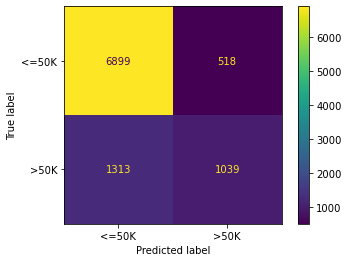

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN_1,X_test,y_test)

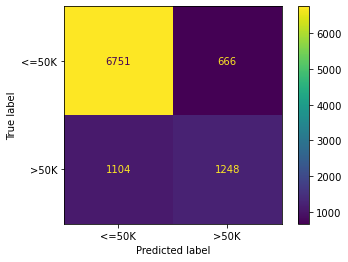

In [79]:
plot_confusion_matrix(NB_1,X_test,y_test)

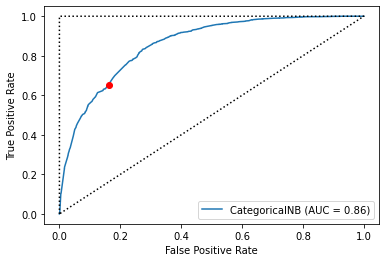

In [142]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve((y_test.to_numpy() == '<=50K').astype(int) , NB_1.predict_proba(X_test)[:,1])

gmean = np.sqrt(tpr * (1 - fpr))
index = np.argmax(gmean)
thresholdOpt = round(threshold[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
plot_roc_curve(NB_1, X_test, y_test)
plt.plot([0, 0, 1, 0], [0, 1, 1, 0], linestyle = ':', color = 'black')
plt.plot(tprOpt,fprOpt,'ro') 
plt.show()


In [147]:
np.mean((y_test.to_numpy() == '<=50K').astype(int) != (NB_1.predict_proba(X_test)[:,1] > thresholdOpt).astype(int))

0.7969085883918517